## OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np

import matplotlib.ticker as ticker

# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
import matplotlib.pyplot as plt

In [2]:
#Importation des données dans un dataframe
df_historique = pd.read_excel(r"historique_immobilier_paris_2017_2021_vdef2.xlsx")
df_portefeuille = pd.read_excel(r"portefeuille_actifs+(3).xlsx")
df_echantillon_a_classer=pd.read_excel(r"echantillon_a_classer2.xlsx")


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :')
for i in df_historique['type_local'].unique():
    print('- ',i)

la liste des différents types de biens immobiliers que nous avons dans les données est :
-  Appartement
-  Local industriel. commercial ou assimilé


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 pour Appartement et 4 pour Local industriel. commercial ou assimilé. 

### 3. Nombre de transactions

In [5]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ',df_historique['date_mutation'].count(),'\n')

print('le nombre de transactions pour les appartements dans les données est ',
      df_historique[df_historique['type_local'] == 'Appartement']['date_mutation'].count(),'\n')

print('le nombre de transactions pour les locaux commerciaux dans les données ',
      df_historique[df_historique['type_local'] != 'Appartement']['date_mutation'].count(),'\n')

le nombre de transactions dans les données est  26196 

le nombre de transactions pour les appartements dans les données est  24353 

le nombre de transactions pour les locaux commerciaux dans les données  1843 



### 4. interval de l'historique des données

In [6]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ',df_historique['date_mutation'].min().date(),'\n')

print('la dernière date de transaction dans les données est le ',df_historique['date_mutation'].max().date())

la première date de transaction dans les données est le  2017-01-02 

la dernière date de transaction dans les données est le  2021-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [7]:
# Calcul de la colonne
df_historique['prix_au_metre_carré']=round(df_historique['valeur_fonciere']/df_historique['surface_reelle'],2)
df_historique

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_metre_carré
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11
...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.78
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,13215.54
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.77
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.18


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [8]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
appartements_paris_df = df_historique[(df_historique['type_local'] == 'Appartement')]

#suppression des colonnes adresse_numero,adresse_nom_voie,code_postal,code_type_local
appartements_paris_df = appartements_paris_df.drop(['adresse_numero', 'adresse_nom_voie','code_type_local'], axis=1)

In [9]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

# Créer une colonne 'annee' pour extraire l'année de la date de mutation
appartements_paris_df['annee'] = appartements_paris_df['date_mutation'].dt.year

# Créer un nouveau DataFrame en regroupant par année et en calculant les moyennes
df_prix_surface_moyens = appartements_paris_df[df_historique['type_local'] == 'Appartement'].groupby('annee').agg({'prix_au_metre_carré': 'mean', 'surface_reelle': 'mean'}).reset_index()

# Renommer les colonnes pour plus de clarté
df_prix_surface_moyens = df_prix_surface_moyens.rename(columns={'prix_au_metre_carré': 'prix_moyen', 'surface_reelle': 'surface_moyenne'})
df_prix_surface_moyens

C:\Users\Berland\AppData\Local\Temp\ipykernel_4940\1175800705.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_prix_surface_moyens = appartements_paris_df[df_historique['type_local'] == 'Appartement'].groupby('annee').agg({'prix_au_metre_carré': 'mean', 'surface_reelle': 'mean'}).reset_index()


,annee,prix_moyen,surface_moyenne
0,2017,9492.859239,44.627737
1,2018,10031.403469,44.271671
2,2019,10562.712563,43.361645
3,2020,10674.872719,42.900654
4,2021,10455.600179,43.479864


On constate sur la moyenne des prix de vente des appartements à Paris que de 2017 à 2019 il y a une augmentation significative du prix moyen de vente des appartements, de 2019 à 2020 Le prix moyen semble rester relativement stable et enfin une légère baisse du prix moyen en 2021 <br>
Nous allons créer un graphique pour mieux le visualiser.

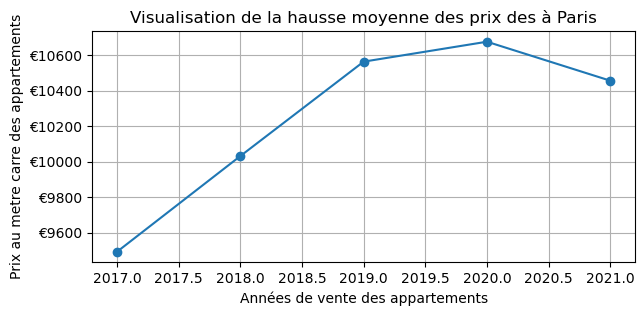

In [10]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(7,3))
plt.plot(df_prix_surface_moyens["annee"], df_prix_surface_moyens["prix_moyen"],marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [11]:
#Liste des codes postaux dans nos données.
df_appartements = df_historique[df_historique["code_type_local"] == 2]
for i in df_appartements['code_postal'].unique():
    print('* ',i)

*  75003
*  75008
*  75001
*  75006
*  75005
*  75007
*  75010
*  75009
*  75011
*  75012
*  75013
*  75014
*  75015
*  75016
*  75017
*  75018
*  75020
*  75019
*  75004
*  75002


In [12]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
# Extraire le numéro d'arrondissement depuis le code postal
appartements_paris_df['arrondissement'] = appartements_paris_df['code_postal'].astype(str).str[3:].astype(int)

# Créer un nouveau DataFrame en regroupant par arrondissement et année, puis calculer la moyenne des prix
df_prix_arrondissement = appartements_paris_df[df_historique['type_local'] == 'Appartement'].groupby(['arrondissement', 'annee']).agg({'prix_au_metre_carré': 'mean'}).reset_index()

# Renommer la colonne pour plus de clarté
df_prix_arrondissement = df_prix_arrondissement.rename(columns={'prix_au_metre_carré': 'prix_moyen'})
df_prix_arrondissement

C:\Users\Berland\AppData\Local\Temp\ipykernel_4940\2363223573.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_prix_arrondissement = appartements_paris_df[df_historique['type_local'] == 'Appartement'].groupby(['arrondissement', 'annee']).agg({'prix_au_metre_carré': 'mean'}).reset_index()


,arrondissement,annee,prix_moyen
0,1,2017,11762.706207
1,1,2018,12621.226327
2,1,2019,13269.256593
3,1,2020,13405.991429
4,1,2021,13379.498571
...,...,...,...
95,20,2017,7886.023280
96,20,2018,8485.163065
97,20,2019,9093.992566
98,20,2020,9329.305238


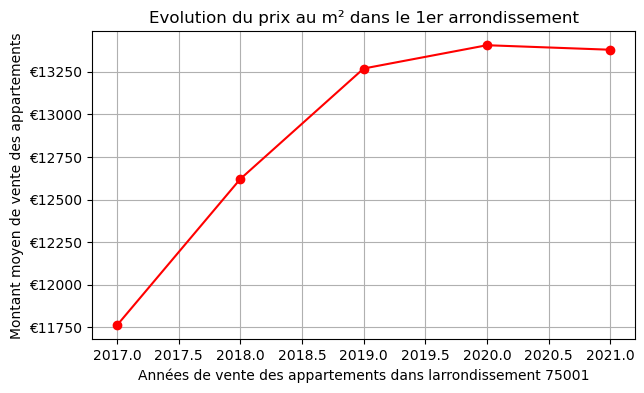

In [13]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
# Filtrer les données pour le premier arrondissement
df_prix_arrondissement_1 = df_prix_arrondissement[df_prix_arrondissement['arrondissement'] == 1]

plt.figure(figsize=(7,4))
plt.plot(df_prix_arrondissement_1['annee'], df_prix_arrondissement_1['prix_moyen'],'o-',color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le 1er arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

<Figure size 1500x1500 with 0 Axes>

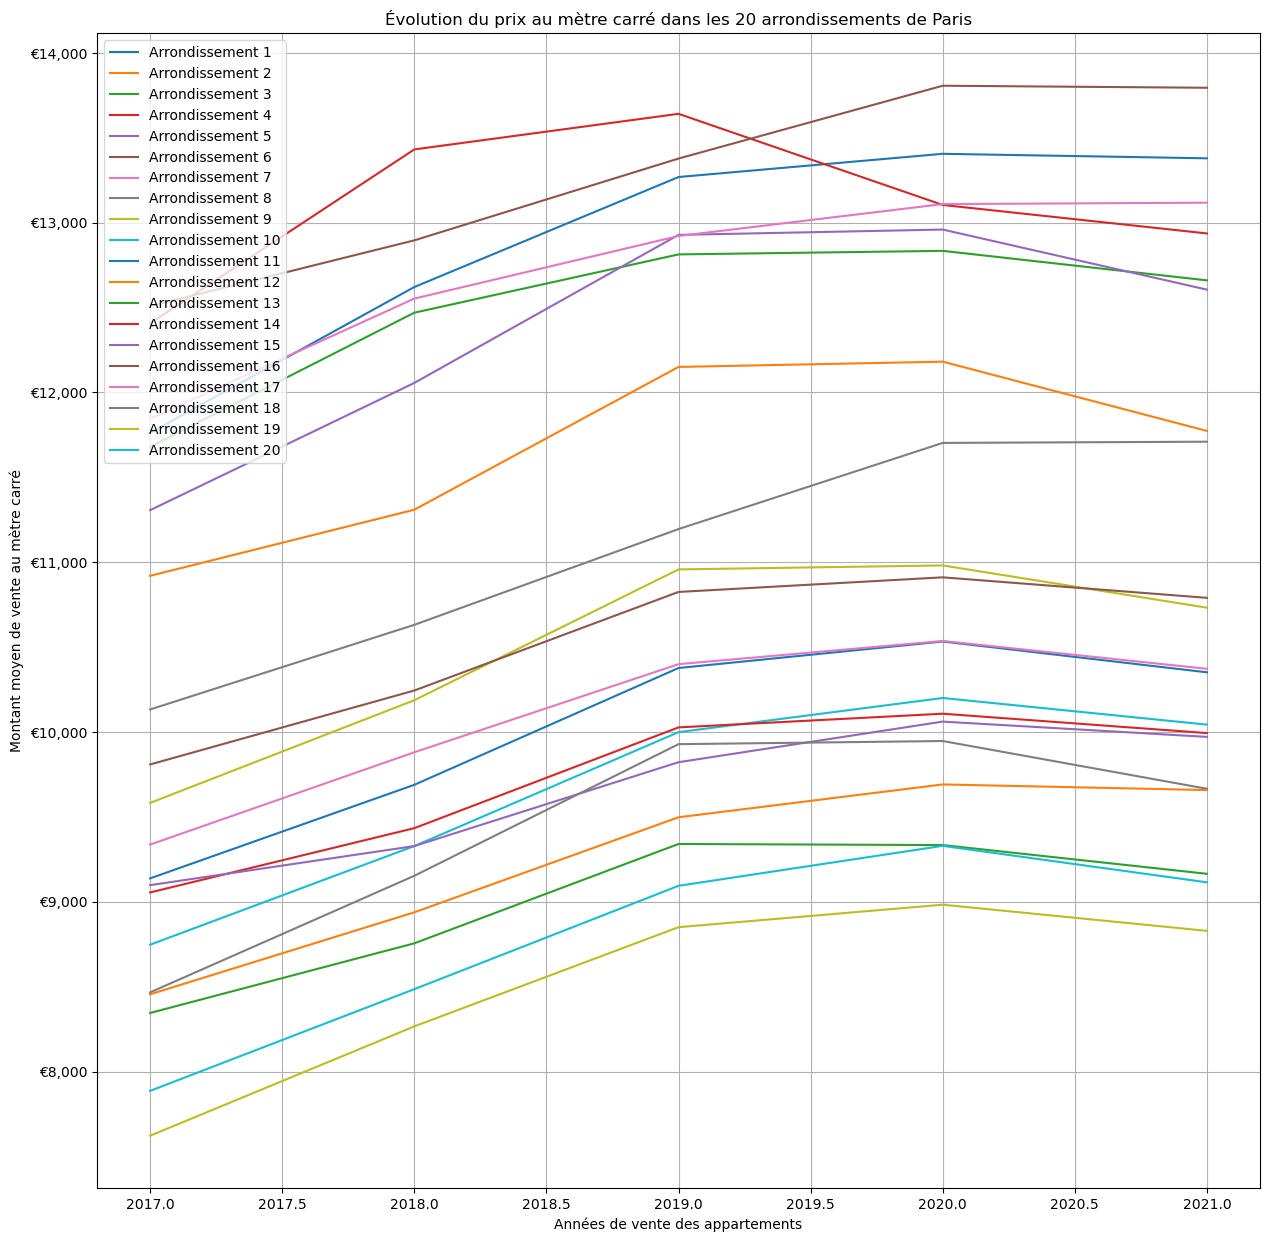

In [14]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']

plt.figure(figsize=(15, 15))

# Insérer les lignes à tracer ci-dessous
for i, arrondissement in enumerate(df_prix_arrondissement['arrondissement'].unique()):
    df_prix_arrondissement_i = df_prix_arrondissement[df_prix_arrondissement['arrondissement'] == arrondissement]
    plt.plot(df_prix_arrondissement_i['annee'], df_prix_arrondissement_i['prix_moyen'], label=f'Arrondissement {arrondissement}')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente au mètre carré')
formatter = ticker.StrMethodFormatter('€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title('Évolution du prix au mètre carré dans les 20 arrondissements de Paris')
plt.legend(loc='upper left')
plt.show()

On observe globalement que l'évolution des prix a augmenté de 8000 en 2017 à plus de 8000 en 2021 selon les arrondissement, aussi l'évolution est segmenté en 3 zones et que l'arrondissement 6 a le nombre de transaction le plus élevé

### 7. Prix au metre carré par transaction dans un arrondissement

In [15]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

Nombre_transaction_6 = df_historique[df_historique['code_postal'] == 75006]
print("le nombre de transaction dans le 6ème est: ",len(Nombre_transaction_6))

le nombre de transaction dans le 6ème est:  782


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

In [16]:

#Affichons l'historique des transactions pour visualiser la dispersion des données :
Nombre_transaction_6.head(5)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_metre_carré
478,2017-01-10,9.601314e+05,169,RUE DE RENNES,75006,Paris 6e Arrondissement,2,Appartement,78,12309.38
482,2017-01-13,8.204362e+05,13,RUE DE MEZIERES,75006,Paris 6e Arrondissement,2,Appartement,68,12065.24
484,2017-01-13,1.796112e+06,8,RUE JOSEPH BARA,75006,Paris 6e Arrondissement,2,Appartement,143,12560.22
488,2017-01-17,2.488198e+05,5,RUE DE CHEVREUSE,75006,Paris 6e Arrondissement,2,Appartement,20,12440.99
491,2017-01-19,4.828724e+05,12,RUE NOTRE DAME DES CHAMPS,75006,Paris 6e Arrondissement,2,Appartement,40,12071.81


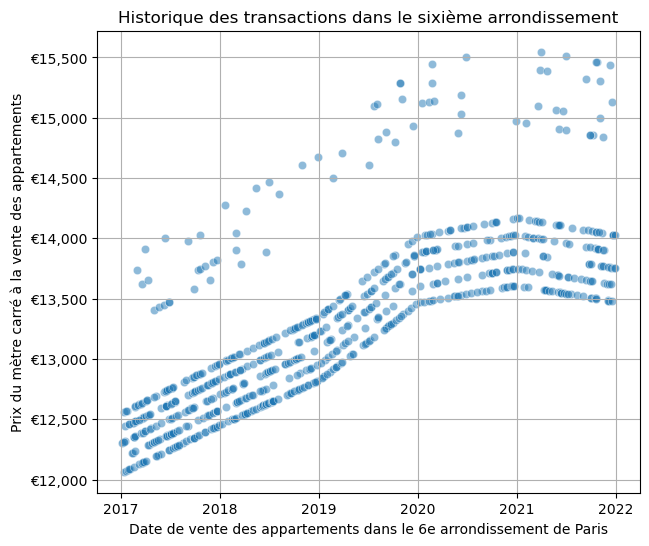

In [17]:
cp=75006
plt.figure(figsize=(7,6))
#Insérer ci-dessous le scatter plot
plt.scatter(Nombre_transaction_6['date_mutation'], Nombre_transaction_6['prix_au_metre_carré'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Date de vente des appartements dans le 6e arrondissement de Paris')
plt.ylabel('Prix du mètre carré à la vente des appartements')
formatter = ticker.StrMethodFormatter('€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement')
plt.show()


On observe que y a une correlation entre la date de transfère et le prix en mètre carré?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [18]:
#On calcule la corrélation de Spearman
from scipy import stats
from scipy.stats import pearsonr

# Assurez-vous que la colonne 'date_mutation' est de type datetime
Nombre_transaction_6['date_mutation'] = pd.to_datetime(Nombre_transaction_6['date_mutation'])

# Convertir la colonne 'date_mutation' en nombre de jours écoulés
Nombre_transaction_6['jours_ecoules'] = (Nombre_transaction_6['date_mutation'] - Nombre_transaction_6['date_mutation'].min()).dt.days

# Calculer le coefficient de corrélation de Pearson
coefficient_correlation, p_value = pearsonr(Nombre_transaction_6['jours_ecoules'], Nombre_transaction_6['prix_au_metre_carré'])

# Afficher le résultat
print(f"Le coefficient de corrélation de Pearson entre le nombre de jours écoulés depuis la première date de mutation et le prix au mètre carré dans le 6ème arrondissement est : {coefficient_correlation}")
print(f"La valeur p associée est : {p_value}, donc nous pouvons confirmer la corrélation.")

Le coefficient de corrélation de Pearson entre le nombre de jours écoulés depuis la première date de mutation et le prix au mètre carré dans le 6ème arrondissement est : 0.77117851063889
La valeur p associée est : 3.929040685439538e-155, donc nous pouvons confirmer la corrélation.


C:\Users\Berland\AppData\Local\Temp\ipykernel_4940\4036519839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nombre_transaction_6['date_mutation'] = pd.to_datetime(Nombre_transaction_6['date_mutation'])
C:\Users\Berland\AppData\Local\Temp\ipykernel_4940\4036519839.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nombre_transaction_6['jours_ecoules'] = (Nombre_transaction_6['date_mutation'] - Nombre_transaction_6['date_mutation'].min()).dt.days


### 9. Vérification de la relation entre la valeur fonciere et la surface

In [19]:
# Calculer le coefficient de corrélation de Pearson
coefficient_correlation, p_value = pearsonr(Nombre_transaction_6['valeur_fonciere'], Nombre_transaction_6['surface_reelle'])

# Afficher le résultat
print(f"Le coefficient de corrélation de Pearson entre la valeur foncière et la surface dans le 6ème arrondissement est : {coefficient_correlation}")
print(f"La valeur p associée est : {p_value}. La relation est donc confirmée.")


Le coefficient de corrélation de Pearson entre la valeur foncière et la surface dans le 6ème arrondissement est : 0.9950870171911571
La valeur p associée est : 0.0. La relation est donc confirmée.


Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [20]:
    #On crée un dataset qui ne contient que les locaux commerciaux
df_locaux=df_historique[(df_historique['type_local'] == 'Local industriel. commercial ou assimilé')]
   

In [21]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

    # Créer un nouveau DataFrame en regroupant par année et en calculant les moyennes
df4=df_locaux[['prix_au_metre_carré']].groupby( df_locaux['date_mutation'].dt.year).mean().reset_index()
df4

,date_mutation,prix_au_metre_carré
0,2017,10949.909513
1,2018,11569.499430
2,2019,11960.132199
3,2020,11966.470268
4,2021,12006.488747


In [22]:
   #On crée un dataset qui ne contient que les apparrtements
df_Appartement=df_historique[(df_historique['type_local'] == 'Appartement')]
   

In [23]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

    # Créer un nouveau DataFrame en regroupant par année et en calculant les moyennes
df3=df_Appartement[['prix_au_metre_carré']].groupby( df_Appartement['date_mutation'].dt.year).mean().reset_index()
df3

,date_mutation,prix_au_metre_carré
0,2017,9492.859239
1,2018,10031.403469
2,2019,10562.712563
3,2020,10674.872719
4,2021,10455.600179


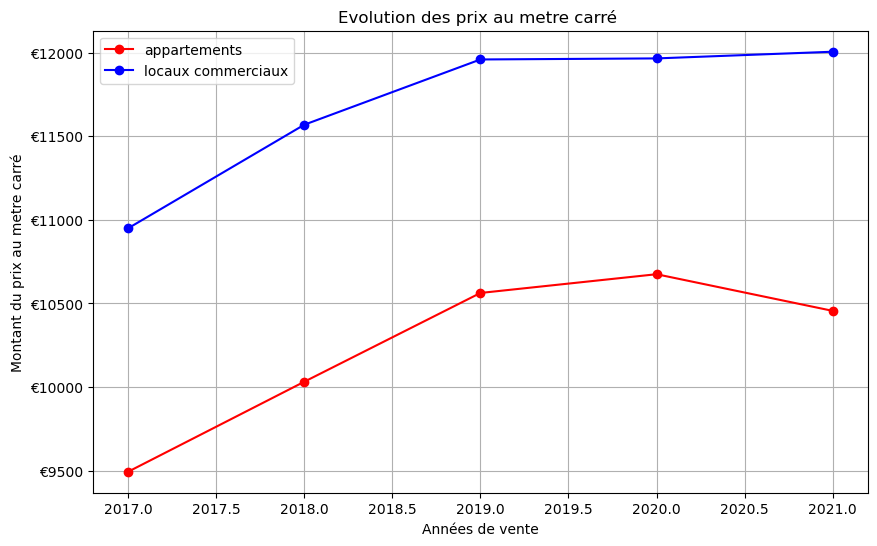

In [24]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,6))
plt.plot(df3['date_mutation'], df3['prix_au_metre_carré'],'o-',label='appartements',color='red')
plt.plot(df4['date_mutation'], df4['prix_au_metre_carré'],'o-',label='locaux commerciaux',color='blue')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est en  moyenne plus élévée que le prix moyen des appartement?

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier, car plus la surface est grande et plus le prix au mètre carée est élévé
- la date considérée, plus la date est recente plus le prix au metre carée est élévé
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal  grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [25]:
df = df_historique

#Conversion des variables catégorielle en variables factices/indicatrices
df_encoded = pd.get_dummies(df, columns=['code_postal'], drop_first=True)

df_encoded['timestamp']=df['date_mutation'].astype('datetime64[s]').astype('int64') 

df_encoded=df_encoded.drop(['date_mutation','adresse_numero','adresse_nom_voie','nom_commune','code_type_local','prix_au_metre_carré','type_local'], axis=1)

# Afficher le DataFrame transformé
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valeur_fonciere    26196 non-null  float64
 1   surface_reelle     26196 non-null  int64  
 2   code_postal_75002  26196 non-null  bool   
 3   code_postal_75003  26196 non-null  bool   
 4   code_postal_75004  26196 non-null  bool   
 5   code_postal_75005  26196 non-null  bool   
 6   code_postal_75006  26196 non-null  bool   
 7   code_postal_75007  26196 non-null  bool   
 8   code_postal_75008  26196 non-null  bool   
 9   code_postal_75009  26196 non-null  bool   
 10  code_postal_75010  26196 non-null  bool   
 11  code_postal_75011  26196 non-null  bool   
 12  code_postal_75012  26196 non-null  bool   
 13  code_postal_75013  26196 non-null  bool   
 14  code_postal_75014  26196 non-null  bool   
 15  code_postal_75015  26196 non-null  bool   
 16  code_postal_75016  261

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [26]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['valeur_fonciere'], axis = 1)
Y = df_encoded[["valeur_fonciere"]]
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [27]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
y_train.columns = y_train.columns.astype(str)
y_test.columns = y_test.columns.astype(str)

In [28]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
# Créez une instance du modèle
model = LinearRegression()

# Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Effectuez des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

In [29]:
import numpy as np

# Calcul du pourcentage d'erreur pour chaque prédiction
pem_individual = np.abs(predictions - y_test) / np.abs(y_test) * 100

# Calcul du pourcentage moyen d'erreur
pem_moyen = np.mean(pem_individual)

print(f"Le pourcentage moyen d'erreur est : {pem_moyen:.2f}% sur la prédiction de la valeur foncière")


Le pourcentage moyen d'erreur est : 9.42% sur la prédiction de la valeur foncière




Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Un pourcentage moyen d'erreur de 9.42% est un résultat respectable
- Le modèle de régression linéaire prédit en moyenne la valeur foncière avec une précision de 90.58%
- Possbilités d'amélioration
- Analyse supplémentaires

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [30]:
#On importe les données dans un dataframe
df_prédiction = df_portefeuille
df_prédiction=df_portefeuille.drop(['adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','code_type_local','longitude','latitude','nombre_pieces_principales','type_local'], axis=1)
#renommé la colonne surface_reelle_bati
df_prédiction.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)

In [31]:
df_prédiction

,code_postal,surface_reelle
0,75001,25
1,75003,22
2,75003,65
3,75008,74
4,75008,22
...,...,...
270,75019,16
271,75002,15
272,75002,35
273,75002,49


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [32]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

df_portefeuille_encoded = pd.get_dummies(df_prédiction,columns=['code_postal'], drop_first=True)

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_portefeuille_encoded['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())



Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [33]:
# Assurez-vous que les colonnes du portefeuille sont les mêmes que celles utilisées pour l'entraînement
df_portefeuille_encoded.columns = df_portefeuille_encoded.columns.astype(str)

# Assurez-vous que l'ordre des colonnes est le même que celui utilisé pour l'entraînement
df_portefeuille_encoded = df_portefeuille_encoded[X_train.columns]

# Effectuez la prédiction
predictions_portefeuille = model.predict(df_portefeuille_encoded)

# Affichez les 10 premières valeurs prédites
print(predictions_portefeuille[:10])


[[440020.67273081]
 [377291.56543209]
 [839963.81442147]
 [895760.71578014]
 [336250.08909531]
 [476127.74576651]
 [398811.20491997]
 [652301.1892371 ]
 [142428.39287185]
 [144172.92993751]]


In [34]:
X_train.columns

Index(['surface_reelle', 'code_postal_75002', 'code_postal_75003',
       'code_postal_75004', 'code_postal_75005', 'code_postal_75006',
       'code_postal_75007', 'code_postal_75008', 'code_postal_75009',
       'code_postal_75010', 'code_postal_75011', 'code_postal_75012',
       'code_postal_75013', 'code_postal_75014', 'code_postal_75015',
       'code_postal_75016', 'code_postal_75017', 'code_postal_75018',
       'code_postal_75019', 'code_postal_75020', 'timestamp'],
      dtype='object')

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [35]:
df_portefeuille['Valeur foncière']=predictions_portefeuille

In [36]:
df_portefeuille

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,Valeur foncière
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,440020.672731
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,377291.565432
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,839963.814421
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,895760.715780
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,336250.089095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397,132438.062321
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196,258136.276572
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514,473332.671451
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784,623970.147866


In [37]:
#Valorisation du portefeuille sur le segment des particuliers
portefeuille_appartement = df_portefeuille[df_portefeuille['code_type_local']==2]['Valeur foncière'].sum()/1000000
print('la valorisation du segment particulier est (en millions deuros):',portefeuille_appartement)


la valorisation du segment particulier est (en millions deuros): 72.11297632607555


In [38]:
#Valorisation du portefeuille sur le segment corporate
portefeuille_local = df_portefeuille[df_portefeuille['code_type_local']==4]['Valeur foncière'].sum()/1000000
print('la valorisation du segment corporate est (en millions deuros):',portefeuille_local)


la valorisation du segment corporate est (en millions deuros): 88.80445851491824


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- le segment avec la plus grande valorisation est corporate

- Bien que au moyen des données historiques nous pouvons prédire la valorisation des segments, il est important de reconnaître la limite de ces résultats. Les fluctuations du marché immobilier sont influencées par une multitude de facteurs, certains imprévisibles. Les événements économiques mondiaux, les changements politiques et d’autres variables externes peuvent avoir un impact significatif. Ceci rend complexe la prédiction absolue des prix.

- Malgré ces défis, Les professionnels du secteur peuvent utiliser ces résultats pour évaluer les tendances générales du marché. Combinés à une analyse approfondie des facteurs économiques et locaux, ces résultats offrent une perspective supplémentaire pour informer les décisions des acteurs immobiliers.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [39]:
#On importe les données dans un dataframe
df_echantillon_a_classer.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [40]:
df_echantillon_a_classer['prix_m2']=df_echantillon_a_classer['valeur_fonciere']/df_echantillon_a_classer['surface_reelle']
classification = df_echantillon_a_classer.drop(['nom_commune','valeur_fonciere','surface_reelle'],axis=1)

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [41]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardiser les données
scaler = StandardScaler()
dfa_std = scaler.fit_transform(classification.astype(float))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

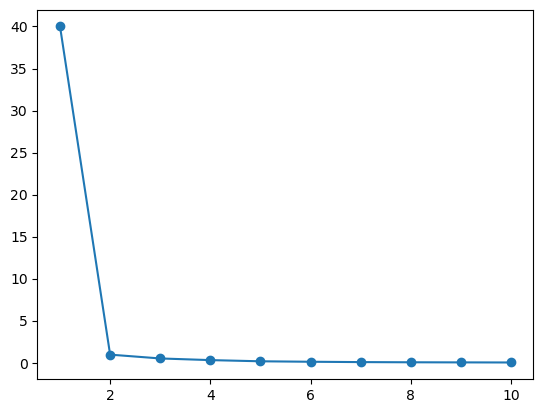

In [42]:
# On vérifie les données de la prédiction
Cluster_range = [1,2,3,4,5,6,7,8,9,10]
inertie = []

for c in Cluster_range:
    # Initialiser un nouvel objet kmeans avec les paramètres spécifiés
    kmeans = KMeans(init='k-means++', n_clusters=c)
    # Appliquer l'algorithme KMeans et ajuster le modèle aux données
    kmeans.fit(dfa_std)
    # Ajouter l'inertie du modèle à la liste
    inertie.append(kmeans.inertia_, )

#dessigner les inerties calculé
plt.Figure()
plt.plot(Cluster_range,inertie,marker='o')
plt.show()

In [43]:
#on part sur 2 clusters
import pandas as pd
kmeans = KMeans(n_clusters=2, n_init=10).fit(dfa_std)
labels=kmeans.labels_

# Création du DataFrame avec les données standardisées et les labels KMeans
df_echantillon_a_classer['labels']=labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='prix_m2'>

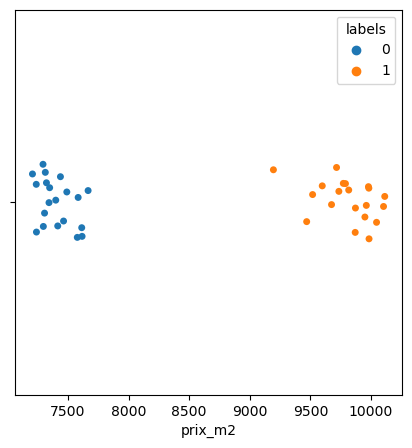

In [44]:
#visualisation des cluster
import seaborn as sns
plt.figure(figsize=(5,5))
sns.stripplot(data=df_echantillon_a_classer, x="prix_m2", hue = 'labels')


Cluster 1 est local et le cluster 0 les appartements, parceque le prix au métre carée est du cluster 0 est superieur au cluster 1

In [45]:
#Ce code ajoute une nouvelle colonne 'label' au DataFrame dataframe en fonction des valeurs de la colonne 'Labels'.
#Il semble attribuer des étiquettes spécifiques en fonction des clusters (labels) obtenus à partir de l'algorithme K-Means
for i in df_echantillon_a_classer.index:
    if round(df_echantillon_a_classer.loc[i,'labels'])==0:
        df_echantillon_a_classer.loc[i,'type_local']='Appartement'
        df_echantillon_a_classer.loc[i,'code_type_local']=int(2)
    else :
        df_echantillon_a_classer.loc[i,'type_local']='Local industriel. commercial ou assimilé'
        df_echantillon_a_classer.loc[i,'code_type_local']=int(4)
df_echantillon_a_classer['code_type_local']=df_echantillon_a_classer['code_type_local'].astype(int)

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [46]:
#On affiche les résultats
df_echantillon_a_classer

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2,labels,type_local,code_type_local
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.444128,1,Local industriel. commercial ou assimilé,4
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.572493,1,Local industriel. commercial ou assimilé,4
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.697790,1,Local industriel. commercial ou assimilé,4
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.142168,1,Local industriel. commercial ou assimilé,4
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.610005,0,Appartement,2
5,179676.304545,75019,Paris 19e Arrondissement,18,9982.016919,1,Local industriel. commercial ou assimilé,4
6,241856.569418,75019,Paris 19e Arrondissement,25,9674.262777,1,Local industriel. commercial ou assimilé,4
7,462981.797149,75019,Paris 19e Arrondissement,63,7348.917415,0,Appartement,2
8,518819.726233,75019,Paris 19e Arrondissement,53,9789.051438,1,Local industriel. commercial ou assimilé,4
9,403670.310822,75019,Paris 19e Arrondissement,53,7616.420959,0,Appartement,2


# Milestone 5 - Analyse et présentation des résultats

In [47]:
df_echantillon_a_classer.groupby('type_local')[['valeur_fonciere','surface_reelle', 'prix_m2']].mean()

,valeur_fonciere,surface_reelle,prix_m2
type_local,,,
Appartement,285652.401235,38.60,7408.775030
Local industriel. commercial ou assimilé,485820.462074,49.35,9806.924674


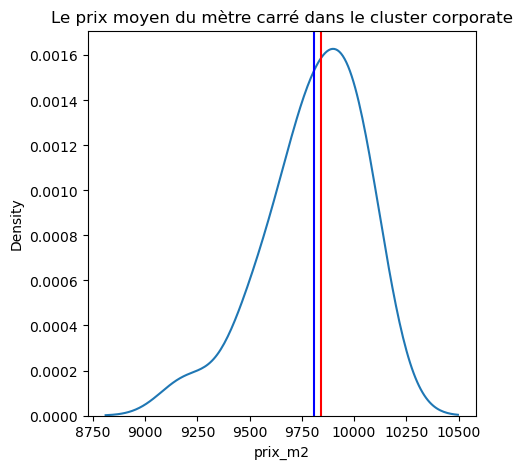

In [50]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=df_echantillon_a_classer[df_echantillon_a_classer['code_type_local'] == 4], x="prix_m2")

mean_value = df_echantillon_a_classer[df_echantillon_a_classer['code_type_local'] == 4]['prix_m2'].mean()


median_value = df_echantillon_a_classer[df_echantillon_a_classer['code_type_local'] == 4]['prix_m2'].median()


plt.axvline(x=mean_value, color='blue')
plt.axvline(x=median_value, color='red')
plt.title('Le prix moyen du mètre carré dans le cluster corporate')
plt.show()

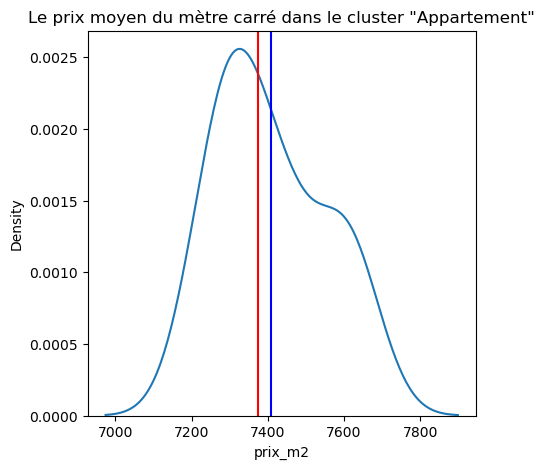

In [49]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=df_echantillon_a_classer[df_echantillon_a_classer['code_type_local'] == 2], x="prix_m2")


mean_value = df_echantillon_a_classer[df_echantillon_a_classer['code_type_local'] == 2]['prix_m2'].mean()


median_value = df_echantillon_a_classer[df_echantillon_a_classer['code_type_local'] == 2]['prix_m2'].median()


plt.axvline(x=mean_value, color='blue')


plt.axvline(x=median_value, color='red')
plt.title('Le prix moyen du mètre carré dans le cluster "Appartement"')
plt.show()



Mes conclusions sur l'analyse et les limites de l'exercice :
- le constat est que d'après les deux graphiques le prix moyen par mètre carré des appartements est bien plus éloigné au prix moyen par mètre carré du segment corporate.

-  Lorsque les données ont un grand nombre de dimensions, les distances entre les points deviennent moins significatives, ce qui peut rendre le clustering moins efficace( en parlons des dimension que nous avons entre les main).

- Il peut être difficile de choisir l'algorithme de clustering le mieux adapté aux données et aux objectifs spécifiques de l'analyse.